<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/02_Unsupervised%20-%20Machine%20Learning/DBSCAN/CreditCard_Fraud_Detection/CreditCard_fraud_transactions_Detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

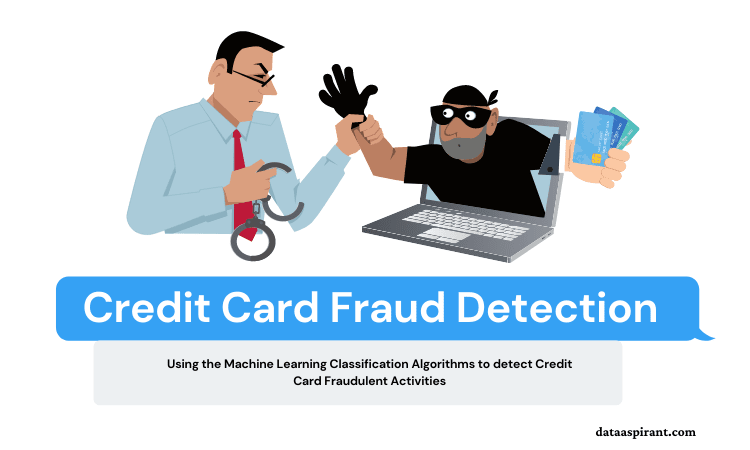
#**💳Credit Card Fraud Detection using DBSCAN Clustering**

##**📘 Project Summary:**
This project focuses on detecting fraudulent credit card transactions using the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm — a powerful unsupervised learning technique for identifying anomalies in large datasets. Unlike traditional supervised methods, this approach does not rely on labeled data; instead, it detects irregular transaction patterns by examining the density distribution of data points.

Through this approach, the model successfully identified two distinct clusters representing:
Legitimate transactions behaviour and fraudulent transactions or unusual spending patterns


The clustering results clearly separate normal spending habits from abnormal activities, demonstrating DBSCAN’s ability to detect anomalies in real-world financial data.

**🎯 Aim of the Project:**
The primary objective is to develop an unsupervised fraud detection system capable of recognizing abnormal transactions automatically. This helps financial institutions and payment processors detect fraud in real-time, minimize financial losses, and enhance overall transaction security.


**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/transactions.csv")
df

In [ ]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

**Feature Engineering**

In [ ]:
df = pd.get_dummies(df, drop_first=True, columns=["type"], dtype=float)
df = df.drop(columns=["nameOrig","nameDest"])
df.head()

##**Resampling DataFrame:**  Resampling DataFrame to 1% (under sampling) because my Dataframe has too much features (199,999) which is too much for my computer

In [ ]:
sampled_df = df.sample(frac=0.1, random_state=42) # Adjust frac as needed
sampled_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
134252,36,449109.84,61750.00,0.00,72855.78,521965.62,0,1.0,0.0,0.0,0.0
124140,402,8593.72,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0
62810,33,9201.16,22962.00,13760.84,0.00,0.00,0,0.0,0.0,1.0,0.0
65425,18,1225.30,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0
30074,235,9820.29,10836.00,1015.71,0.00,0.00,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
66536,402,256092.75,0.00,0.00,341142.66,597235.41,0,1.0,0.0,0.0,0.0
35956,374,5634.21,20142.00,14507.79,0.00,0.00,0,0.0,0.0,1.0,0.0
99702,402,20445.65,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0
97700,307,6214.57,14940.00,8725.43,0.00,0.00,0,0.0,0.0,1.0,0.0


**Scaling features using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(sampled_df), columns=df.columns)

**Dimensionality Reduction:** Used PCA for better visualization.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns= ["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,0.113668,-0.590559
1,-1.164196,-0.164423
2,-1.206245,-0.109803
3,-1.214536,-0.115309
4,-1.182927,-0.140990


**Visualising Data**

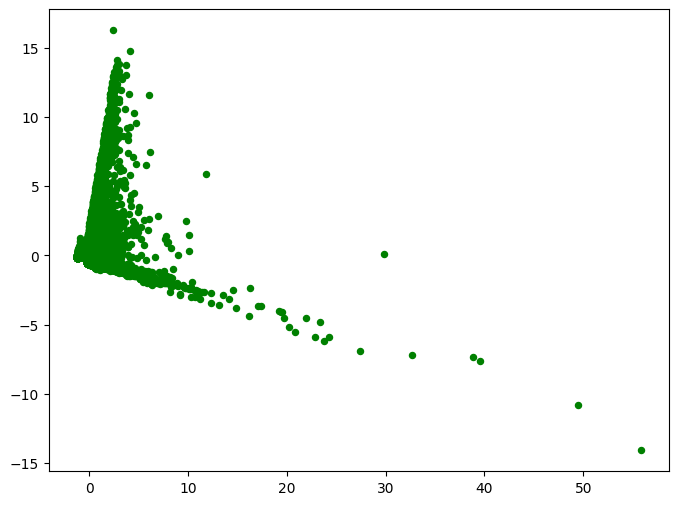

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Visualize the DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['pca1'], pca_df['pca2'], c="g", s=19)
plt.show()

**Checking to see different clustering model performance (in terms of score).**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

def view(algorithm):
  model = algorithm
  model.fit(scaled_df)

  if len(set(model.labels_)) <= 1:
    print(f"{algorithm} score is <= 1" )

  else:
    score = silhouette_score(scaled_df, model.labels_)
    print(f"{algorithm} score is: {score}")
print(view(KMeans(2)))
print(view(DBSCAN(eps=2, min_samples=5)))
print(view(AgglomerativeClustering(2)))

KMeans(n_clusters=2) score is: 0.5289831012830868
None
DBSCAN(eps=2) score is: 0.4779937839571237
None
AgglomerativeClustering() score is: 0.26951079051234006
None


##**Plot to find best number of Eps Selection (DBSCAN) using K-nearest Neighbour**

From my plot, the elbow seems to begin rising around the y-axis value between 1 and 2.
So your best eps value is approximately: 2




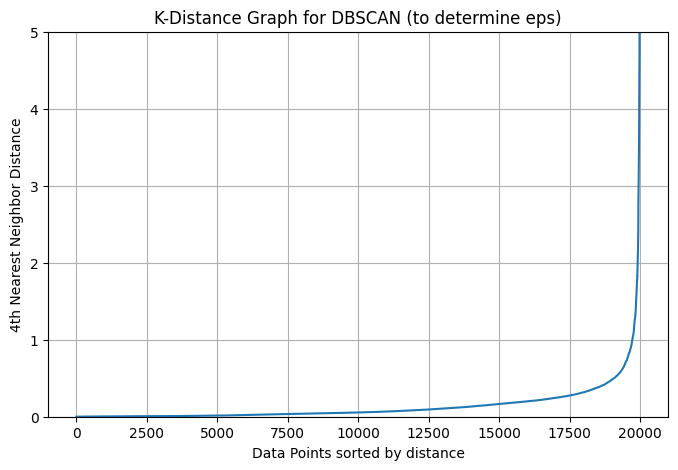

In [ ]:
# DBSCAN Eps Selection (Elbow-like plot)
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Assume you already have your scaled data
# sampled_scaled_df

# Choose the number of nearest neighbors (usually min_samples)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)

# Find the distances to the nearest neighbors
distances, indices = nbrs.kneighbors(scaled_df)

# Sort the distances (we’ll look at the 4th nearest neighbor distance)
distances = np.sort(distances[:, 4])

print("From my plot, the elbow seems to begin rising around the y-axis value between 1 and 2.")
print("So your best eps value is approximately: 2")
print("\n")
# Plot to find the “elbow”
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN (to determine eps)")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.ylim(0, 5)  # 👈 Focus on the lower range (adjust this number)

plt.show()


##**Visualising DBSCAN cluster**

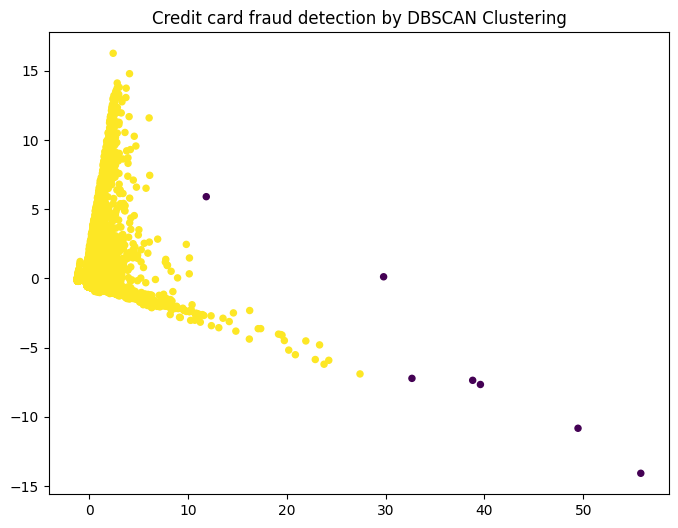

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=5, metric="euclidean")
pca_df["cluster"] = dbscan.fit_predict(pca_df)

import seaborn as sns
plt.figure(figsize=(8,6))
plt.scatter(pca_df["pca1"], pca_df["pca2"], c= pca_df["cluster"], s=19)
plt.title("Credit card fraud detection by DBSCAN Clustering")
plt.show()

#**Assign clusters to scaled_df which can later be used for supervised machine learning**


In [ ]:
scaled_df["cluster"] = dbscan.fit_predict(pca_df)
scaled_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,cluster
0,-1.467565,0.406560,-0.265122,-0.290945,-0.312559,-0.197284,-0.037443,1.379558,-0.079305,-0.730818,-0.298872,0
1,1.128540,-0.253512,-0.287113,-0.290945,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
2,-1.488844,-0.252602,-0.278936,-0.286106,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
3,-1.595242,-0.264553,-0.287113,-0.290945,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
4,-0.056021,-0.251674,-0.283254,-0.290588,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.128540,0.117342,-0.287113,-0.290945,-0.231882,-0.176352,-0.037443,1.379558,-0.079305,-0.730818,-0.298872,0
19996,0.929931,-0.257947,-0.279940,-0.285844,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
19997,1.128540,-0.235753,-0.287113,-0.290945,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0
19998,0.454688,-0.257077,-0.281793,-0.287877,-0.334468,-0.342439,-0.037443,-0.724870,-0.079305,1.368329,-0.298872,0


In [ ]:
sampled_df["cluster"] = dbscan.fit_predict(pca_df)
sampled_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,cluster
134252,36,449109.84,61750.00,0.00,72855.78,521965.62,0,1.0,0.0,0.0,0.0,0
124140,402,8593.72,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0,0
62810,33,9201.16,22962.00,13760.84,0.00,0.00,0,0.0,0.0,1.0,0.0,0
65425,18,1225.30,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0,0
30074,235,9820.29,10836.00,1015.71,0.00,0.00,0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66536,402,256092.75,0.00,0.00,341142.66,597235.41,0,1.0,0.0,0.0,0.0,0
35956,374,5634.21,20142.00,14507.79,0.00,0.00,0,0.0,0.0,1.0,0.0,0
99702,402,20445.65,0.00,0.00,0.00,0.00,0,0.0,0.0,1.0,0.0,0
97700,307,6214.57,14940.00,8725.43,0.00,0.00,0,0.0,0.0,1.0,0.0,0


In [ ]:
labels = {-1:"Fraud Transaction", 0:"Legit"}
sampled_df["Label_names"] = sampled_df["cluster"].map(labels)
pd.reset_option('display.float_format')
sampled_df[sampled_df["cluster"]==-1]


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,cluster,Label_names
103811,283,234466.13,11230257.42,11464723.54,8.953718e+07,8.930271e+07,0,0.0,0.0,0.0,0.0,-1,Fraud Transaction
98207,311,13514515.37,0.00,0.00,6.919266e+07,8.270717e+07,0,0.0,0.0,0.0,1.0,-1,Fraud Transaction
145838,355,534637.88,163343.00,0.00,1.174216e+08,1.181619e+08,0,0.0,0.0,0.0,1.0,-1,Fraud Transaction
101498,331,221003.64,0.00,0.00,1.225401e+08,1.225628e+08,0,1.0,0.0,0.0,0.0,-1,Fraud Transaction
61170,379,318054.65,16461478.06,16779532.72,3.226135e+07,3.194330e+07,0,0.0,0.0,0.0,0.0,-1,Fraud Transaction
62710,304,22095655.53,0.00,0.00,1.016806e+08,1.237763e+08,0,0.0,0.0,0.0,1.0,-1,Fraud Transaction
124405,281,52042803.47,0.00,0.00,5.351036e+07,1.055532e+08,0,0.0,0.0,0.0,1.0,-1,Fraud Transaction


#**📊 Results & Insights:**
The DBSCAN model effectively grouped the majority of transactions as legitimate while isolating a small set of anomalies as potentially fraudulent. This demonstrates the algorithm’s strength in uncovering hidden fraud patterns without requiring prior knowledge or labels.


##**Conclusion (Deployment Use Case):**
When deployed, this system can be integrated into banking or payment processing platforms to continuously monitor transactions, identify unusual behavior, and trigger alerts for potential fraud. By leveraging density-based clustering, it provides a scalable, adaptive, and data-driven approach to enhancing fraud detection and maintaining customer trust.
